7. What is the prediction subject for the model that will be trained using this ABT?

(a). One instance of the prediction subject in the ABT will represent each row, which determines the fundamental level at which predictions are formed.Drilling site is the prediction subject because ABT is an oil drilling firm.


(b). Describe the domain concepts for this ABT.
 
  A domain idea is a high-level abstraction that represents a property of the prediction subject from which we can generate a set of concrete attributes for an ABT.

Aerial Photographs: From the outer view of land like aerial images of the site under consideration, few ABT features should be retrieved.

Ordinance Survey Map: Ordinance survey maps contains few features information, such as descriptions of any surrounding infrastructure and elevation.

Rock and Soil samples: A considerable number of descriptive features like type of soil and rock can be derived from the analysis of soil and rock samples from a drilling location.

Measuring Instruments: The output from specialized equipment may most likely be divided into Gravitational and Seismic for this application scenario. Any investigation of a site utilizing specialized instruments that results in a report should be included in an ABT

Viability: Target attribute.

7.c.Draw a domain concept diagram for the ABT.
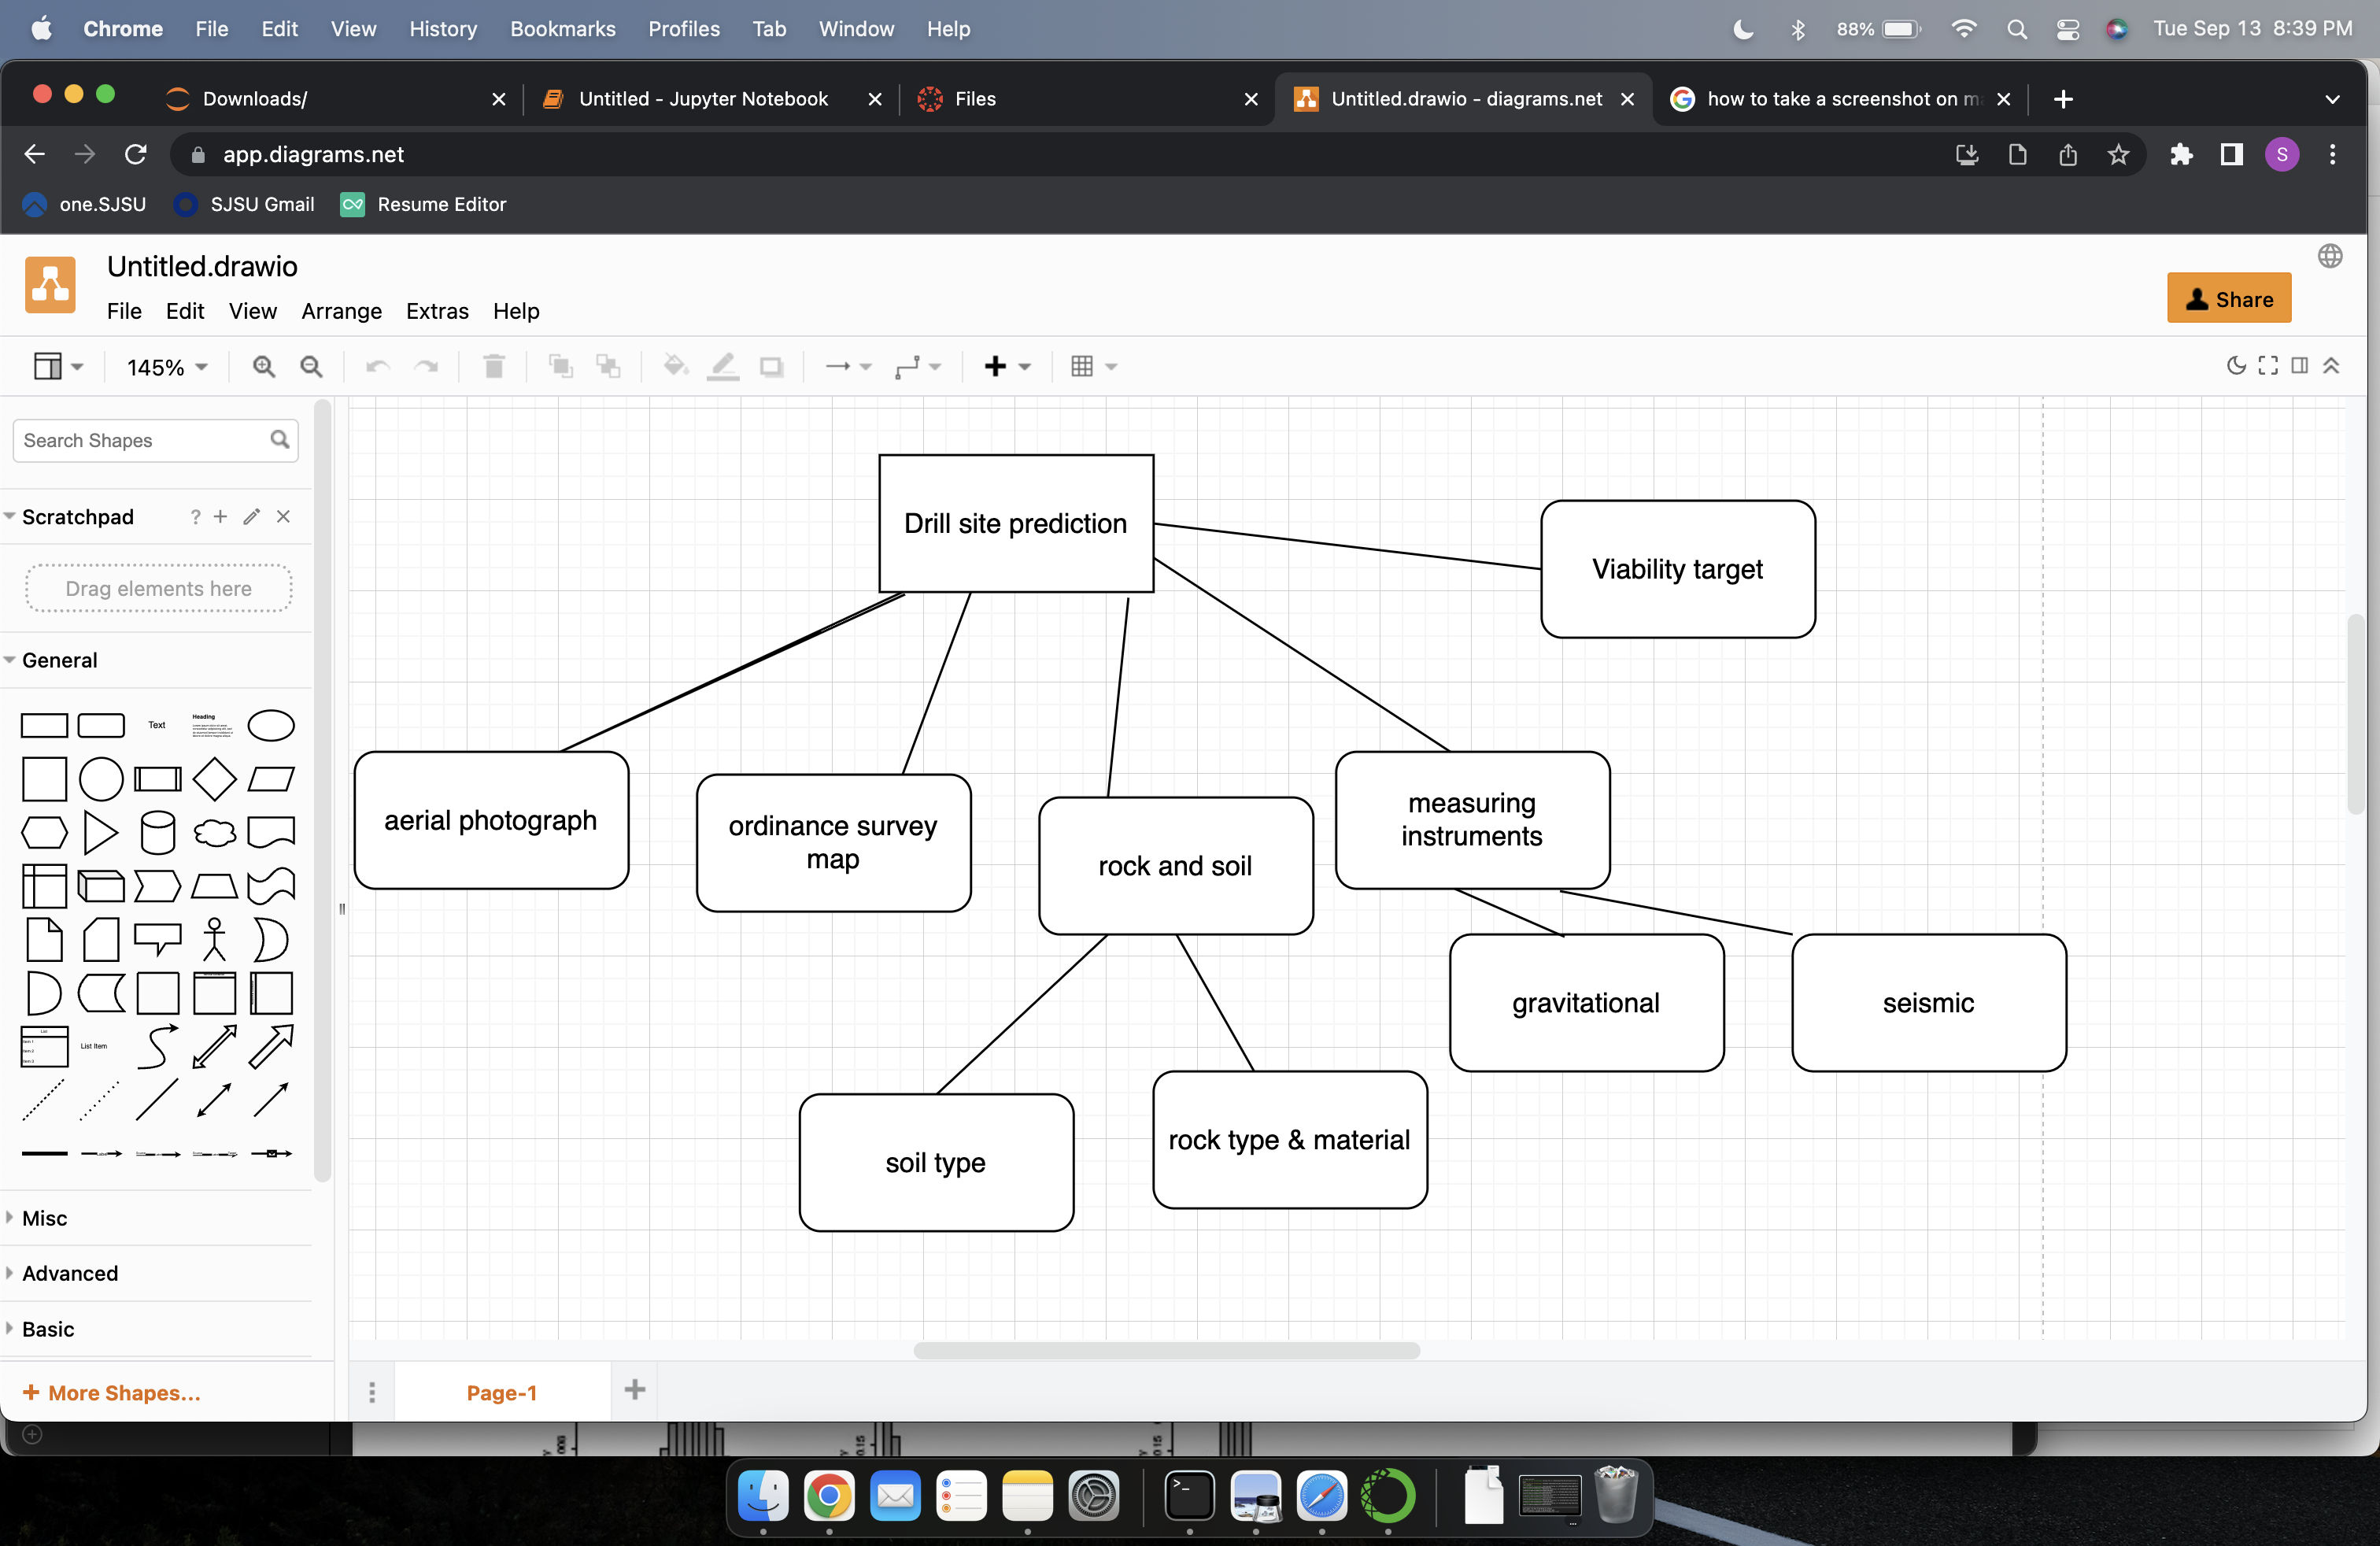



(d).
Are there likely to be any legal issues associated with the domain concepts you have included?

There will not be any legal complications for the described domain concepts. As the data and model will only be used within the organization. But the oil firm should apply for permission to take images of aerial perspective which will be granted when YOU apply for photography permission.





In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# chapter 3

5.(a) 
A range normalization that generates data in the range (0, 1)

In [2]:
Data = pd.DataFrame([42,47,59,27,84,49,72,43,73,59,58,82,50,79,89,75,70,59,67,35],columns=['SCORE'])
high=1
low=0
normalized_data = []

for i in Data['SCORE']:
    normalized_Score = ((i - min(Data['SCORE']))/((max(Data['SCORE'])-min(Data['SCORE'])))*(high - low)) + low
    normalized_data.append(normalized_Score)

Normalized=pd.DataFrame(normalized_data,columns=['SCORE'])
Normalized

,SCORE
0,0.241935
1,0.322581
2,0.516129
3,0.000000
4,0.919355
5,0.354839
6,0.725806
7,0.258065
8,0.741935
9,0.516129


b. A range normalization that generates data in the range (−1, 1)

In [3]:
high=1
low=-1
normalized_data = []

for i in Data['SCORE']:
    normalized_Score = ((i - min(Data['SCORE']))/((max(Data['SCORE'])-min(Data['SCORE'])))*(high - low)) + low
    normalized_data.append(normalized_Score)

Normalized=pd.DataFrame(normalized_data,columns=['SCORE'])
Normalized

,SCORE
0,-0.516129
1,-0.354839
2,0.032258
3,-1.000000
4,0.838710
5,-0.290323
6,0.451613
7,-0.483871
8,0.483871
9,0.032258


c. A standardization of the data

In [4]:
mean = Data['SCORE'].mean()
stdev = Data['SCORE'].std()
normalised_score=[(i - mean)/stdev for i in Data['SCORE']]
Normalized=pd.DataFrame(normalised_score,columns=['SCORE'])
Normalized

,SCORE
0,-1.098428
1,-0.808605
2,-0.113031
3,-1.967896
4,1.336083
5,-0.692676
6,0.640508
7,-1.040464
8,0.698473
9,-0.113031


# chapter 3

6
a. An equal-width binning using 5 bins.

we need to determine the bin size as range/b, where b is number of bins, to do equal width binning.The min value is 72 and max value is 120

bin size is (120-72)/5 = 9.6


In [5]:
Data=pd.DataFrame([92,107,83,101,107,92,99,119,93,106,105,88,106,90,97,118,120,72,100,104],columns=['IQ'])
width= (max(Data['IQ'])-min(Data['IQ']))/5
width

9.6

In [6]:
Data['IQ'].value_counts(bins=5,sort=False)

(71.951, 81.6]    1
(81.6, 91.2]      3
(91.2, 100.8]     6
(100.8, 110.4]    7
(110.4, 120.0]    3
Name: IQ, dtype: int64

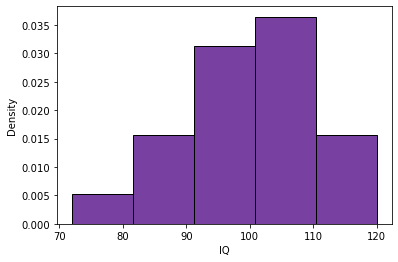

In [7]:
sample_plot=sns.histplot(data=Data['IQ'],stat='density',color='Indigo',bins=5)
sample_plot.set(xlabel='IQ',ylabel='Density')
plt.show()

<AxesSubplot:>

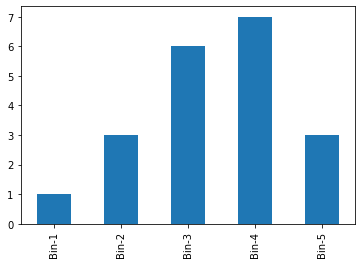

In [8]:
labels= ['Bin-1','Bin-2','Bin-3','Bin-4','Bin-5']
data=pd.cut(Data['IQ'],bins=5,labels=labels)
data.value_counts().sort_index(ascending = True).plot(kind='bar')

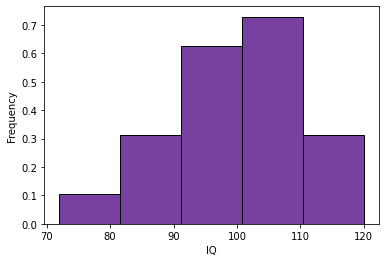

In [9]:
sample_plot=sns.histplot(data=Data['IQ'],stat='frequency',color='Indigo',bins=5)
sample_plot.set(xlabel='IQ',ylabel='Frequency')
plt.show()

6.b. An equal-frequency binning using 5 bins

To calculate equal-frequency binnng, we need to know how many instances are there in each bin.This can be done by dividing the number of instances in the dataset with number of bins. i.e; 20/5=4

In [10]:
Num_of_bins=5
Num_values_bin = len(Data['IQ'])/Num_of_bins
Num_values_bin

4.0

In [11]:
Sorted_data=Data.sort_values(by=['IQ'])
Sorted_data

,IQ
17,72
2,83
11,88
13,90
0,92
5,92
8,93
14,97
6,99
18,100


AxesSubplot(0.125,0.125;0.775x0.755)


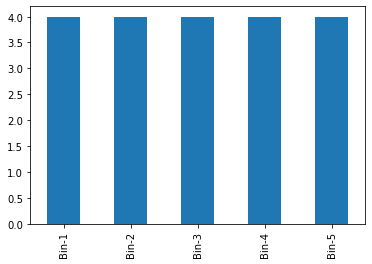

In [12]:
Data = [92,107,83,101,107,92,99,119,93,106,105,88,106,90,97,118,120,72,100,104]
np.random.seed(100) #for better reproduction
Data_set_rnd = np.array(Data)+np.random.random(len(Data)) #adding some noise to the data to get the equal bins
Data_series = pd.Series(Data_set_rnd, name='IQ')
qc = pd.qcut(Data_series,q=5,precision=0, labels =labels)
print(qc.value_counts().sort_index().plot(kind='bar'))
plt.show()

7.(a)
The data is normally distributed and the curve is symmetric around the center of the mean.The mean is between 150 and 200.

(b). The number of prior criminal convictions held by people given prison sentences follows exponential distribution with a strong tendency around zero and the likelihood of witnessing higher levels is steadily decreasing. The exponential distribution is a continuous distribution that is widely used to estimate how long an event will take to happen.

(c).
The data has bimodal distribution.A basic bimodal distribution, which is a blend of two normal distributions with the same variance but distinct means in this case. When the two modes are unequal, the bigger mode is referred to as the major mode, while the smaller mode is referred to as the minor mode. In this case there is one central tendency around 110 and the other is around 160. From the question we can understand that this two groups can be smokers and non-smokers.

(d). The employee ID numbers of the academic staff at the university follows uniform distribution.A family of symmetric probability distributions known as the uniform distribution or rectangle distribution.

(e). The salaries of motor insurance policy holders have a substantial right skew and follows a unimodal distribution. A huge amount of the data collected on one side of the chart and only a tiny portion on the other is referred to as skewed data. This type of distribution should always be interpreted as a sign that the data contains valid outliers that must be addressed.


9.(a).
missing values

Common issues in ABT is missing values , which is an example of noise in the data. From the data quality report given by the consultant %Miss column shows that PREV.TACHY, TACHYCARDIA, H.R.DIFF has missing value percentages of 44.02%, 2.01%, and 13.03%. The missing values percentage of PREV.TACHY is 44.02% which is so high, and almost half of the data related to this feature is missing. Instead of completely deleting features with a large number of missing values, you can create a missing indicator feature from them but doing this can alter the dataset so this feature should be removed from the dataset. The missing value percentage of TACHYCARDIA is 2.01%, which is very less but considering that TACHYCARDIA features is the dataset’s goal feature, hence the fact that there are missing values for it is concerning. So, the complete instances in the dataset that have missing values for this feature should be eliminated. The number of missing values in the H.R. DIFF (13.03%). feature is not so high that it should be removed from the ABT, but it is too high to warrant removing the entire case.so any missing values were replaced using mean imputation for continuous features.

(b). Irregular cardinality

The number of distinct values present for a feature within an ABT is shown in the Card. column of the data quality report. When the cardinality for a feature does not match what we expect, this is known as an irregular cardinality mismatch. The cardinalities of many of the numeric features in the data set are substantially lower than the number of rows in the dataset. because the majority of the attributes are integers with defined ranges. When we look at the AGE bar plot, we can see that there are only 7 different values, each of which is fairly well represented. The cardinality of the AGE feature is 7, which is relatively low for a numeric feature. By this we can understand that the AGE feature in this dataset is categorical, with ordinal categories rather than actual age values. Some machine learning algorithms will struggle to effectively use this type of features. If a categorical feature has a substantially greater cardinality than we would expect given the feature's definition, it is said to have irregular cardinality. We can observe this in GENDER feature With cardinality of 4. By looking into the dataset, we can see that the values for GENDER feature is male, female, m, and f which is a data quality issue. This m and f should ne changed to male and female to eliminate this irregular cardinality.

(c).

Outliers are values that deviate significantly from a feature's central tendency. Invalid outliers and valid outliers are the two types of outliers that can arise in an ABT. Invalid outlier are values that were accidentally included in a sample and are commonly referred to as data noise. Valid outliers are correct values for a feature that are merely extremely different from the rest of the values. The data quality report can be used in two different ways to find outliers in a dataset. The first step is to look at the minimum and maximum values for each feature and assess whether they are feasible using domain knowledge. The difference between the median, lowest, maximum, 1st quartile, and 3rd quartile values is the second method for identifying outliers. By looking into the dataset and visualizations we can see that HEIGHT, BMI, and SYS.BP has problems with outliers. The histogram of the HEIGHT feature values, for example, reveals a substantial tilt to the left. The gap between the 1st quartile and median values, as well as the difference between the minimum and 1st quartile values, is significant. When we look at the data, we can see that there are a few height numbers that are several orders of magnitude lower than the majority of the values. In the presence of outliers, several machine learning approaches do not perform well. BMI values should range from about 16 to about 60 but by looking into the dataset the maximum value for BMI feature is 596,495.39 and seems to have a lot of very large values. As BMI is calculated using WEIGHT and HEIGHT, erroneous HEIGHT numbers are likely to result in incorrect BMI values. Correcting the inaccurate HEIGHT values and recalculating the BMI values could eliminate these outliers. 140 mm Hg or higher systolic is considered as high blood pressure but in the given dataset one of the value for SYS.BP is very high(1,144) which id not reasonable. This value should be corrected.



(d).
However, determining the difference in descriptive feature distributions might be helpful in determining what has changed to cause a model to become stale. The H.R DIFF feature appears to be bi-modal, with a peak at the top.The majority of continuous descriptive characteristics have a normal distribution.

# 6. coding assignment

In [13]:
housing_data=pd.read_csv("/Users/shashidharreddy/Downloads/housing.csv")
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
housing_data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [15]:
housing_data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


Finding missing values

In [16]:
rows= 20640
missing_values=housing_data.isnull().sum().sum()
print("Missing Data Percentage:",round((missing_values/rows)*100,4),"%")

Missing Data Percentage: 1.0029 %


In [17]:
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [18]:
housing_data = housing_data.dropna()

In [19]:
housing_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Finding duplicate values

In [20]:
housing_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20433, dtype: bool

This housing dataset is having a total of 20639 rows and 10 columns. There are 207 missing values for total_bedrooms which are deleted in order to avoid errors. All the features in this dataset has unique values with no duplicates.One categorical variable(ocean_proximity) is there in this dataset.

Measuring central tendency-mean,median,mode


In [21]:
mean_cols = np.mean(housing_data,axis=0)
mean_cols

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


longitude               -119.570689
latitude                  35.633221
housing_median_age        28.633094
total_rooms             2636.504233
total_bedrooms           537.870553
population              1424.946949
households               499.433465
median_income              3.871162
median_house_value    206864.413155
dtype: float64

In [22]:
median_cols = housing_data.median(axis=0)
median_cols

/var/folders/_z/tzl90pjd2dd71r4zx2pgn5zm0000gn/T/ipykernel_10735/4041815941.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_cols = housing_data.median(axis=0)


longitude               -118.4900
latitude                  34.2600
housing_median_age        29.0000
total_rooms             2127.0000
total_bedrooms           435.0000
population              1166.0000
households               409.0000
median_income              3.5365
median_house_value    179700.0000
dtype: float64

In [23]:
mode_cols = housing_data.mode(axis=0)
mode_cols

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.31,34.06,52.0,1527.0,280.0,891.0,306.0,3.125,500001.0,<1H OCEAN


measure of variability

In [24]:
housing_data_df = housing_data.drop(['ocean_proximity'],axis=1)
min_cols = np.amin(housing_data_df)
min_cols

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


longitude              -124.3500
latitude                 32.5400
housing_median_age        1.0000
total_rooms               2.0000
total_bedrooms            1.0000
population                3.0000
households                1.0000
median_income             0.4999
median_house_value    14999.0000
dtype: float64

In [25]:
max_cols = np.amax(housing_data_df)
max_cols

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


longitude               -114.3100
latitude                  41.9500
housing_median_age        52.0000
total_rooms            39320.0000
total_bedrooms          6445.0000
population             35682.0000
households              6082.0000
median_income             15.0001
median_house_value    500001.0000
dtype: float64

In [26]:
range_cols = max_cols - min_cols
range_cols

longitude                 10.0400
latitude                   9.4100
housing_median_age        51.0000
total_rooms            39318.0000
total_bedrooms          6444.0000
population             35679.0000
households              6081.0000
median_income             14.5002
median_house_value    485002.0000
dtype: float64

In [27]:
correlation=housing_data_df.corr().T
correlation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


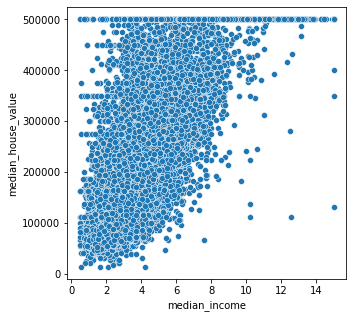

In [28]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='median_income', y='median_house_value', data=housing_data_df)
plt.show()

Median income and median house value appear to be directly proportionate, meaning that as income rises, so does the median house price. This is linked in a favorable way.

The range of values is -1.0 to 1.0. There was an error in the correlation measurement if the calculated number was more than 1.0 or less than -1.0. A perfect negative correlation is represented by a correlation of -1.0, whereas a perfect positive correlation is represented by a correlation of 1.0. A correlation of 0.0 indicates that there is no linear link between the two features.

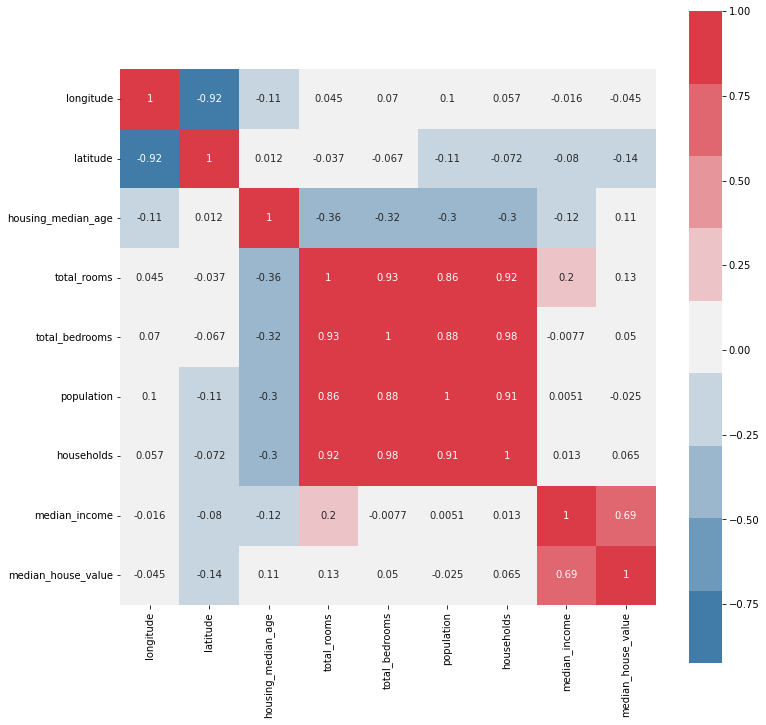

In [29]:
div_pallet=sns.diverging_palette(240, 10, n=9)
plt.subplots(figsize=(12,12))
sns.heatmap(correlation,cmap= div_pallet,annot=True, square=True);

<Figure size 432x288 with 0 Axes>

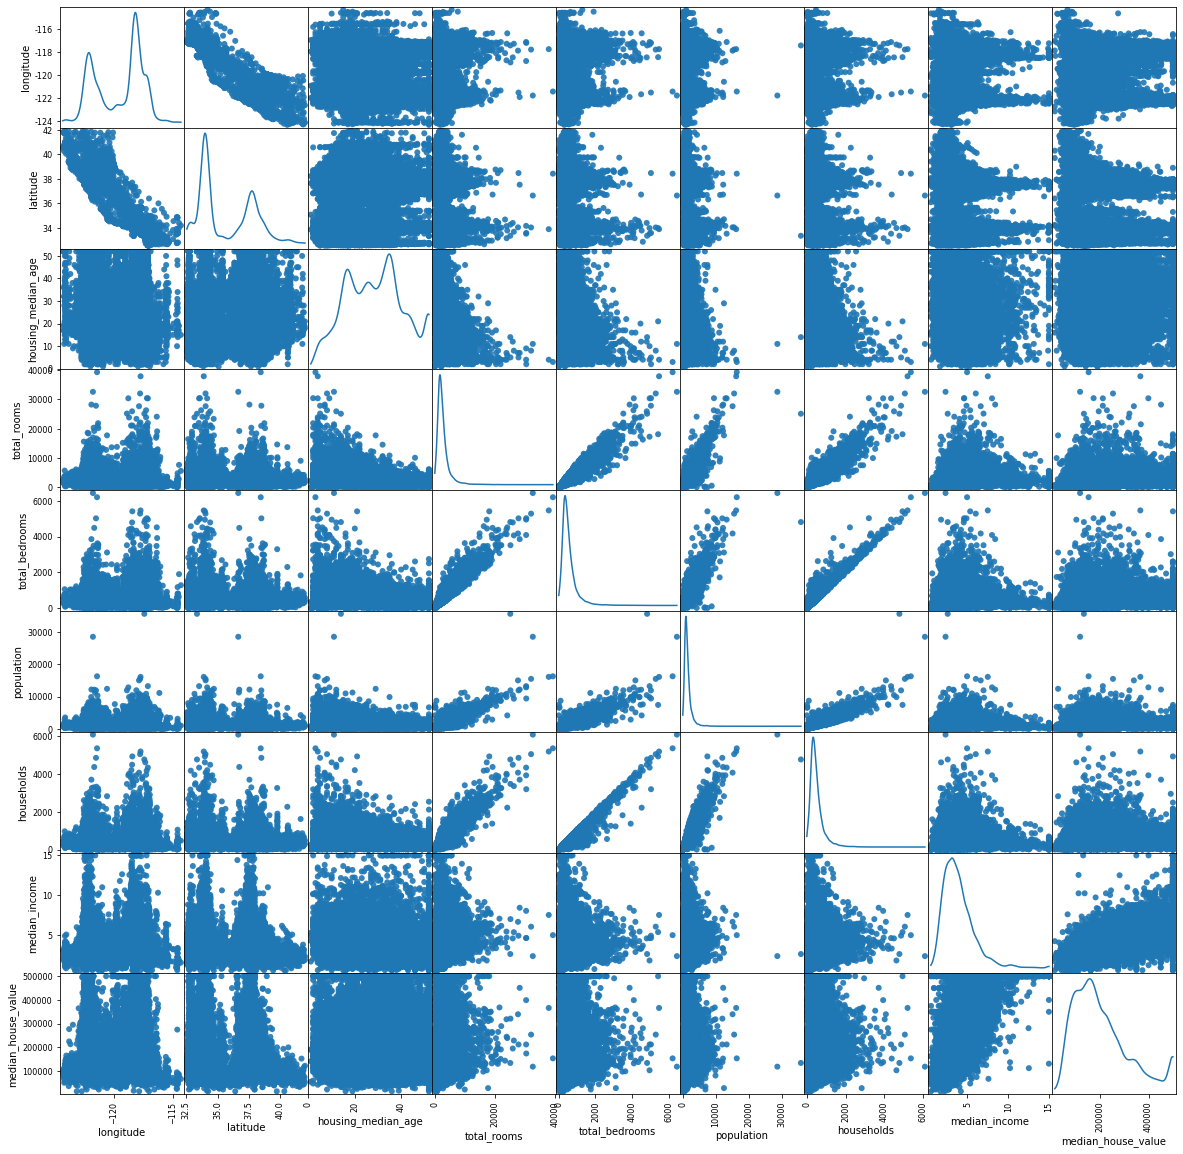

In [30]:
from pandas.plotting import scatter_matrix
fig = plt.figure();
Scatter_plot= scatter_matrix(housing_data_df, figsize = (20,20), alpha=0.9, diagonal="kde", marker="o");

From the above scatter plot we can see that there is a strong positive correlation between (total_bedrooms and households),(total_bedrooms and total_rooms) and strong negitive correlation between (Latitude and Longitude) and no correlation between (housing_median_age and median_housing_value),(housing_median_age and Latitude),(housing_median_age and Longitude).

covariance

In [31]:
total_bedrooms = housing_data_df['total_bedrooms']
households = housing_data_df['households']
Bedrooms_mean = sum(total_bedrooms) / len(total_bedrooms)
households_mean = sum(households) / len(households)
covariance = sum((a - Bedrooms_mean) * (b - households_mean) for (a,b) in zip(total_bedrooms,households)) / (len(total_bedrooms))
print(np.cov(total_bedrooms,households, bias=True))

[[177556.6871537  157821.78385534]
 [157821.78385534 146145.54533335]]


Text(0.5, 1.0, 'Distribution Of Housing Median Age')

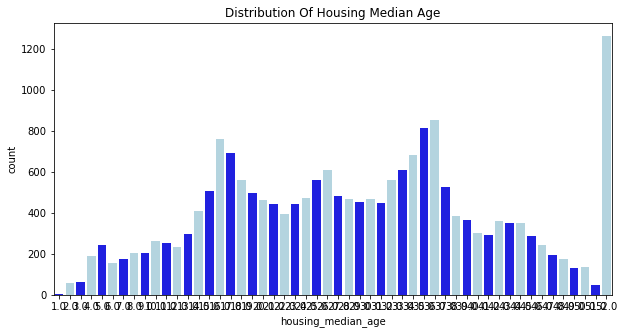

In [32]:
plt.figure(figsize=(10,5))
cols= ["blue","lightblue"]
Dist_age=sns.countplot(x=housing_data_df['housing_median_age'],data=housing_data_df,palette = cols)
Dist_age.set_title("Distribution Of Housing Median Age")

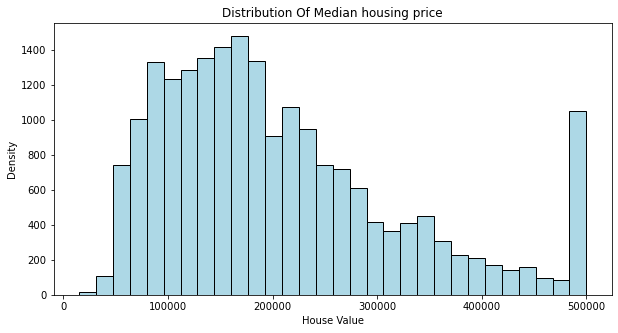

In [33]:
plt.figure(figsize=(10,5))
Dist_median_house=plt.hist(housing_data_df.median_house_value,bins=30,color='lightblue',edgecolor='black')
plt.title("Distribution Of Median housing price")
plt.ylabel('Density')
plt.xlabel('House Value')
plt.show()

<AxesSubplot:xlabel='median_house_value'>

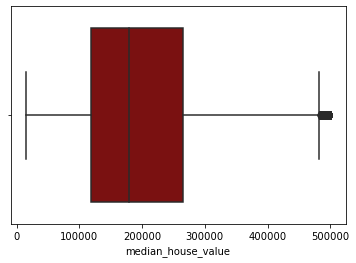

In [34]:
boxplot_median_house = sns.boxplot(x='median_house_value', data=housing_data_df,color="darkred")
boxplot_median_house

<AxesSubplot:xlabel='median_income'>

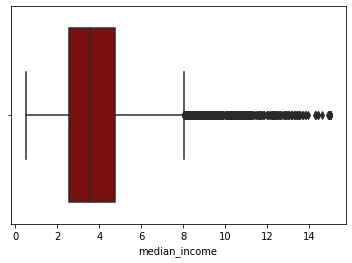

In [35]:
boxplot_median_income = sns.boxplot(x='median_income', data=housing_data_df,color="darkred")
boxplot_median_income

<AxesSubplot:xlabel='median_income'>

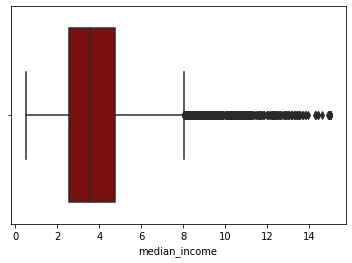

In [36]:
boxplot_median_income = sns.boxplot(x='median_income', data=housing_data_df,color="darkred")
boxplot_median_income

<AxesSubplot:xlabel='households'>

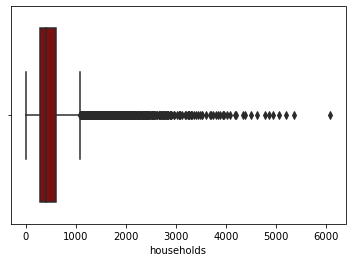

In [37]:
boxplot_households = sns.boxplot(x='households', data=housing_data_df,color="darkred")
boxplot_households

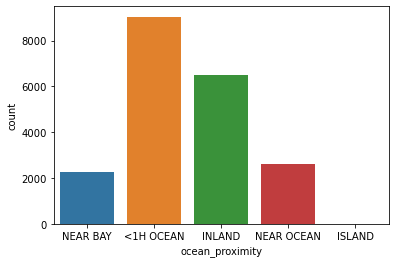

In [38]:
sns.countplot(x="ocean_proximity",data=housing_data)
plt.show()

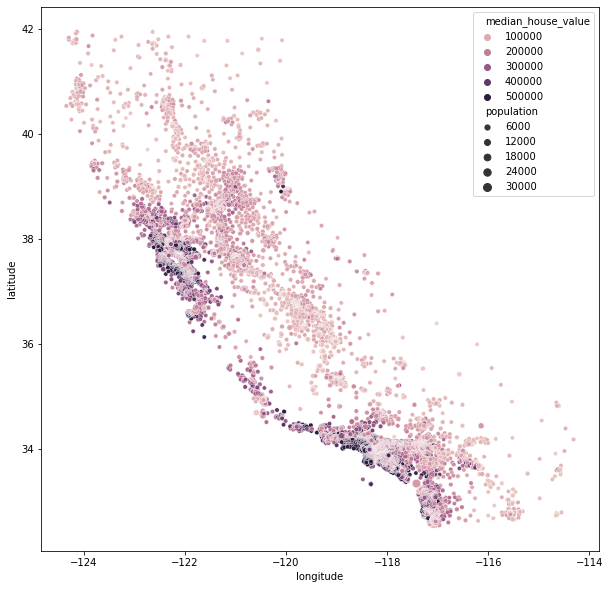

In [39]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value', size='population', data=housing_data_df)
plt.show()